,stock,buy price,current price,quantity,absolute return,return %,rating,suggetions
0,HDFC,3200,3450,5,250,7.81,moderate,hold
1,TCS,1500,1420,10,-80,-5.33,weak,exit
2,INFOSYS,1725,1800,8,75,4.35,moderate,hold
3,WIPRO,410,390,12,-20,-4.88,weak,exit
4,RELIANCE,2500,2700,3,200,8.00,moderate,hold


total portofolio value : 425
worst  performer stock : TCS with -5.33% return
best performer stock : RELIANCE with 8.0 % return


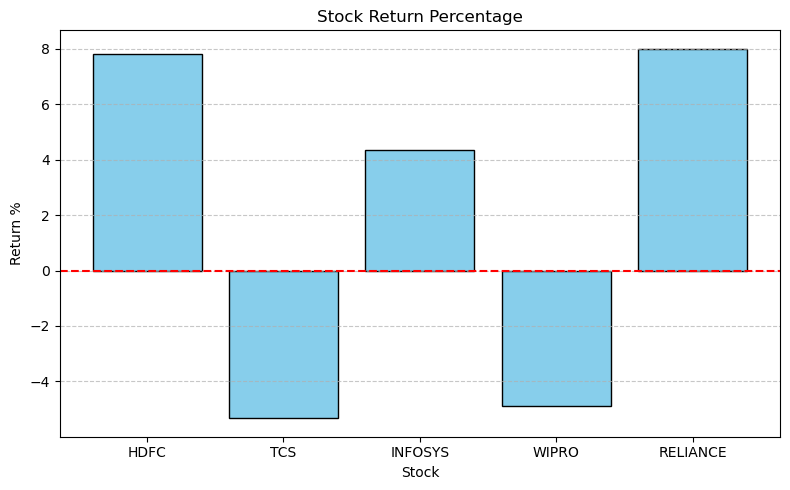

In [48]:
import pandas as pd
data={
"stock" : ["HDFC", "TCS", "INFOSYS", "WIPRO", "RELIANCE"],
"buy price" : [3200, 1500, 1725, 410, 2500],
"current price" : [3450, 1420, 1800, 390, 2700],
"quantity" : [5, 10, 8, 12, 3]
}

df=pd.DataFrame(data)
from IPython.display import display

df["absolute return"]=df["current price"]-df["buy price"]
df["return %"]=((df["current price"]-df["buy price"])/df["buy price"]*100).round(2)

def rate_stock(r):
    if r>10:
        return "strong"
    elif 10>=r>=0:
        return"moderate"
    else :
        return"weak"
df["rating"]=df["return %"].apply(rate_stock)
def suggest_stock(rating):
    if rating == "strong":
        return "buy more"
    elif rating == "moderate":
        return "hold"
    else :
        return"exit"
df["suggetions"]=df["rating"].apply(suggest_stock)
display(df)


total_value=df["absolute return"].sum()
print(f"total portofolio value : {total_value}")

worst_index=df["return %"].idxmin()            
worst_stock=df.loc[worst_index,"stock"]  #df.loc[worst_index, "stock"]
print(f"worst  performer stock : {worst_stock} with {df.loc[worst_index,'return %']}% return")

best_index=df["return %"].idxmax()
best_stock=df.loc[best_index,"stock"]
print(f"best performer stock : {best_stock} with {df.loc[best_index,'return %']} % return")

import matplotlib.pyplot as plt

# Bar chart of return %
plt.figure(figsize=(8, 5))
plt.bar(df["stock"], df["return %"], color="skyblue", edgecolor="black")
plt.title("Stock Return Percentage")
plt.xlabel("Stock")
plt.ylabel("Return %")
plt.axhline(0, color='red', linestyle='--')  # shows break-even line
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

